In [14]:
import os
import sys
import glob
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
df = pd.read_csv('./final_data.csv')
df.describe(include = 'all')

,duration,end_of_fade_in,key,loudness,mode,start_of_fade_out,tempo,time_signature,artist_name,title,e_grammy,e_billboard,e_spotify
count,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000,36000,36000.000000,36000.000000,36000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20767,33904,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Korn,Intro,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,66,NaN,NaN,NaN
mean,249.261201,0.801210,5.314278,-10.114084,0.671250,240.421663,123.834423,3.596833,NaN,NaN,0.000861,0.012139,0.272056
std,125.084289,2.352931,3.590478,5.200930,0.469765,123.040659,34.994275,1.220518,NaN,NaN,0.029332,0.109507,0.445025
min,0.626490,0.000000,0.000000,-52.839000,0.000000,0.626000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,181.341590,0.000000,2.000000,-12.641250,0.000000,173.543000,97.582750,3.000000,NaN,NaN,0.000000,0.000000,0.000000
50%,229.106485,0.194000,5.000000,-8.967000,1.000000,220.183000,122.015500,4.000000,NaN,NaN,0.000000,0.000000,0.000000
75%,288.704850,0.429000,9.000000,-6.381000,1.000000,278.767000,144.252750,4.000000,NaN,NaN,0.000000,0.000000,1.000000


In [16]:
#draw all the 7 boxplots we require for each column
def drawBoxPlotsByColumn(df, colName, successType):
    print('Global boxplot by',colName)
    sns.boxplot(y = df[colName])
    plt.show()
    if 'e_grammy' in successType:
        print('Boxplot grouped by grammy success')
        sns.boxplot(x = 'e_grammy', y = colName, data = df[[colName, 'e_grammy']] )
        plt.show()
    if 'e_billboard' in successType:
        print('Boxplot grouped by billboard success')
        sns.boxplot(x = 'e_billboard', y = colName, data = df[[colName, 'e_billboard']] )
        plt.show()
    if 'e_spotify' in successType:
        print('Boxplot grouped by spotify success')
        sns.boxplot(x = 'e_spotify', y = colName, data = df[[colName, 'e_spotify']] )
        plt.show()
    
def drawBoxPlotsNoOutlierByColumn(df,colName):
    print('Global boxplot by',colName)
    ax = sns.boxplot(y = df[colName], fliersize=0)
    plt.show()
    print('Boxplot grouped by grammy success')
    sns.boxplot(x = 'e_grammy', y = colName, data = df[[colName, 'e_grammy']], fliersize=0)
    plt.show()
    print('Boxplot grouped by billboard success')
    sns.boxplot(x = 'e_billboard', y = colName, data = df[[colName, 'e_billboard']], fliersize=0)
    plt.show()
    print('Boxplot grouped by spotify success')
    sns.boxplot(x = 'e_spotify', y = colName, data = df[[colName, 'e_spotify']], fliersize=0)
    plt.show()

def drawAllBoxPlots(df, successType):
    columns = df.columns[:-5]
    for col in columns:
        drawBoxPlotsByColumn(df, col, successType)
    
def drawAllBoxPlotsNoOutlier(df):
    columns = df.columns[:-5]
    for col in columns:
        drawBoxPlotsNoOutlierByColumn(df, col)

Global boxplot by duration


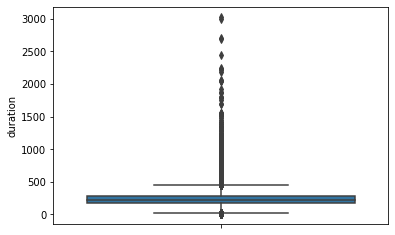

Boxplot grouped by grammy success


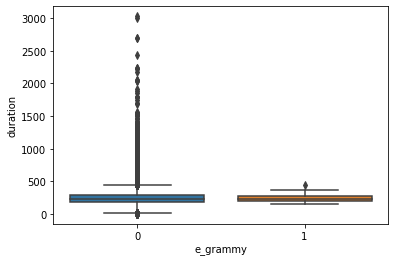

Global boxplot by end_of_fade_in


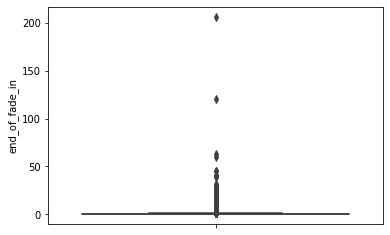

Boxplot grouped by grammy success


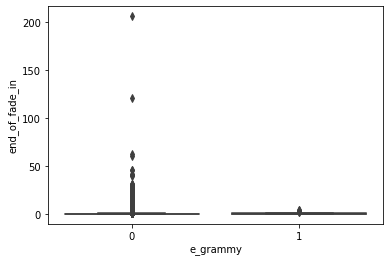

Global boxplot by key


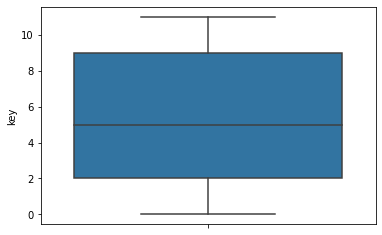

Boxplot grouped by grammy success


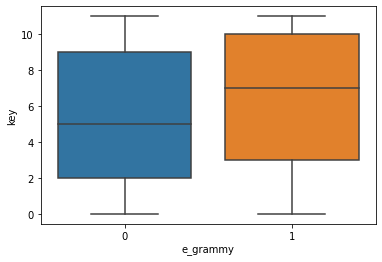

Global boxplot by loudness


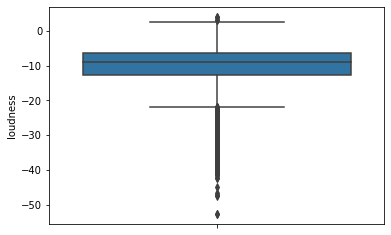

Boxplot grouped by grammy success


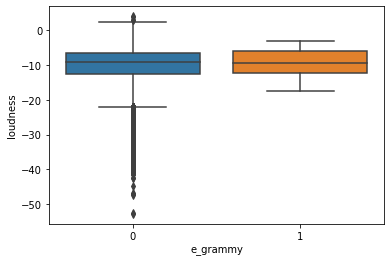

Global boxplot by mode


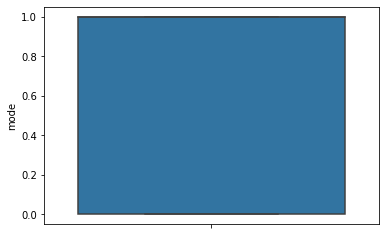

Boxplot grouped by grammy success


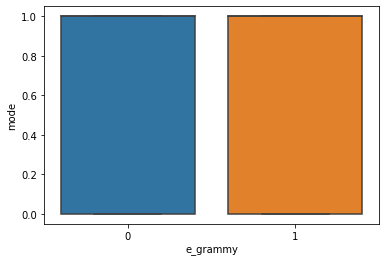

Global boxplot by start_of_fade_out


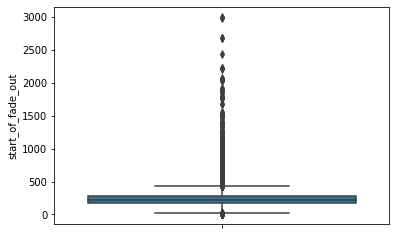

Boxplot grouped by grammy success


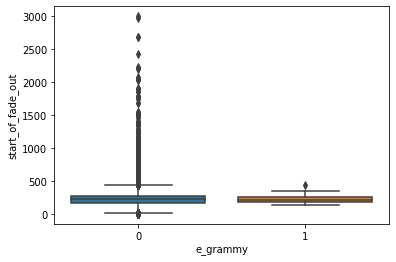

Global boxplot by tempo


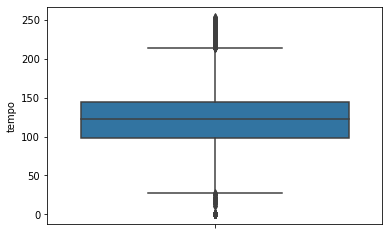

Boxplot grouped by grammy success


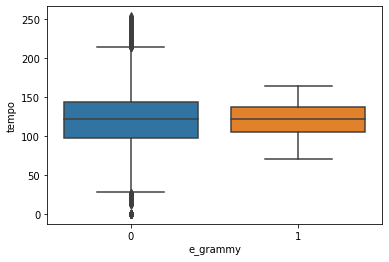

Global boxplot by time_signature


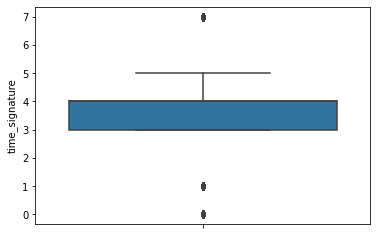

Boxplot grouped by grammy success


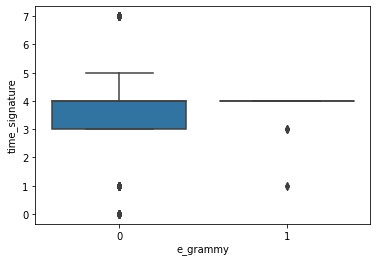

In [5]:
drawAllBoxPlots(df, ['e_grammy'])

Global boxplot by duration


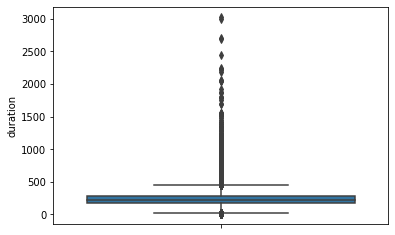

Boxplot grouped by billboard success


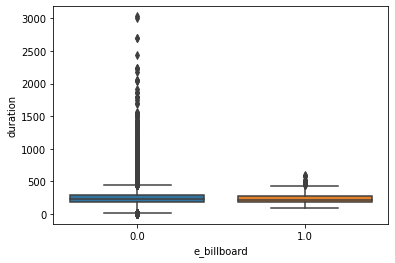

Global boxplot by end_of_fade_in


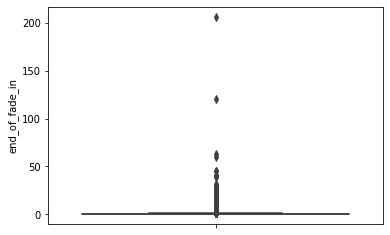

Boxplot grouped by billboard success


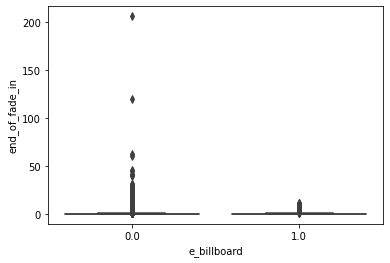

Global boxplot by key


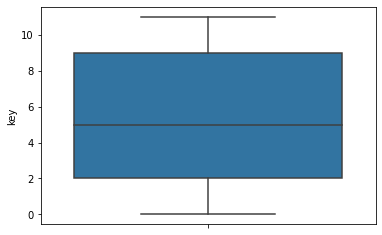

Boxplot grouped by billboard success


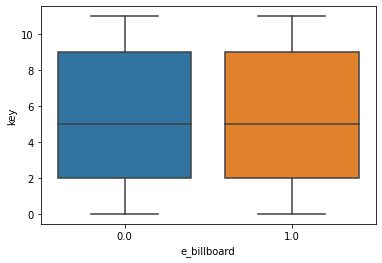

Global boxplot by loudness


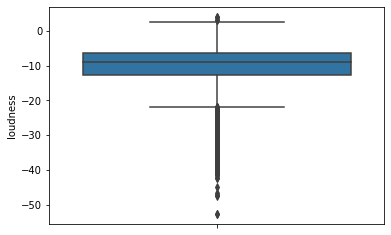

Boxplot grouped by billboard success


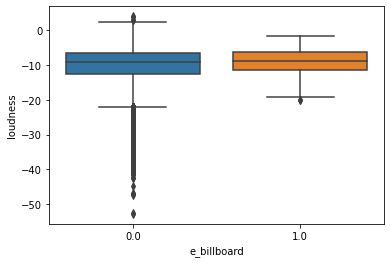

Global boxplot by mode


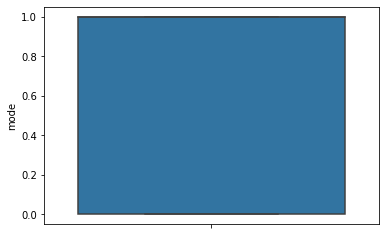

Boxplot grouped by billboard success


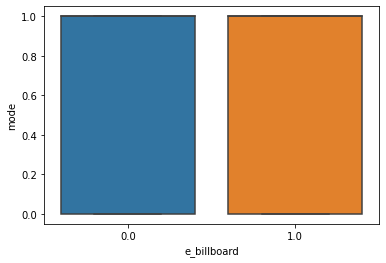

Global boxplot by start_of_fade_out


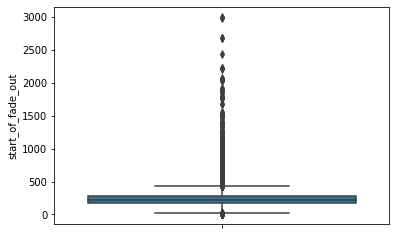

Boxplot grouped by billboard success


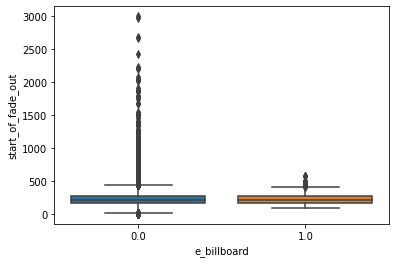

Global boxplot by tempo


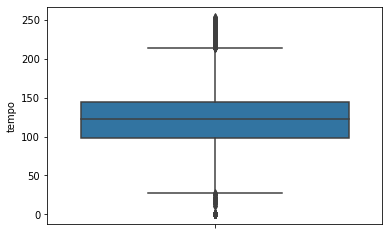

Boxplot grouped by billboard success


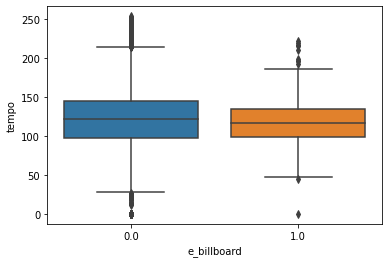

Global boxplot by time_signature


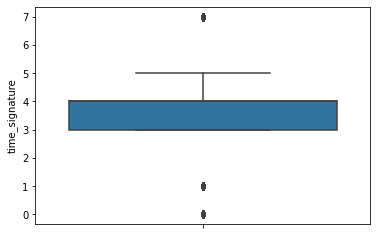

Boxplot grouped by billboard success


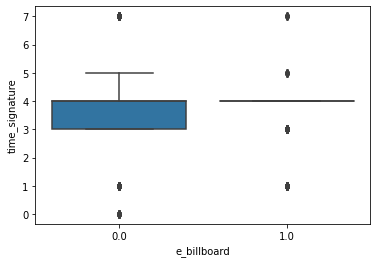

In [9]:
drawAllBoxPlots(df, ['e_billboard'])

In [11]:
n = len(df)

def confidence_interval(f, n, z):
    a = f-z*math.sqrt((f*(1-f)/n))
    b = f+z*math.sqrt((f*(1-f)/n))
    return f'Interval de confiança per 0.955: [{a},{b}]'

In [12]:
import math
#adequació amb va Bernoulli per Grammy
f = len(df[df['e_grammy'] == 1]) / n
print('Freqüència relativa:',f)
print(confidence_interval(f, n, 2))

Freqüència relativa: 0.0008611111111111111
Interval de confiança per 0.955: [0.000551924076963416,0.0011702981452588062]


In [13]:
#adequació amb va Bernoulli
f = len(df[df['e_spotify'] == 1]) / len(df)
print(f)
print(confidence_interval(f, n, 2))

0.27205555555555555
Interval de confiança per 0.955: [0.2673646502858174,0.2767464608252937]


La freqüència relativa és un estimador de ML per la p de Bernoulli, per tant considerem el nostre model com Ber(0.0116894)